In [1]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

In [2]:
%cd C:\Users\Tole 01\Desktop\Micromaster_Data_Science\Week-4-Pandas\movielens\ml-25m

C:\Users\Tole 01\Desktop\Micromaster_Data_Science\Week-4-Pandas\movielens\ml-25m


In [3]:
!ls -a

.
..
README.txt
genome-scores.csv
genome-tags.csv
links.csv
movies.csv
ratings.csv
tags.csv


# DATA EXPLORATION

## MOVIES DATA

In [4]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [5]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [7]:
movies.genres.value_counts()

Drama                                   9056
Comedy                                  5674
(no genres listed)                      5062
Documentary                             4731
Comedy|Drama                            2386
                                        ... 
Action|Adventure|Crime|Fantasy             1
Drama|Film-Noir|Musical|Thriller           1
Action|Drama|Horror|Mystery                1
Adventure|Comedy|Sci-Fi|Thriller|War       1
Comedy|Horror|Mystery|Sci-Fi|Western       1
Name: genres, Length: 1639, dtype: int64

In [8]:
# Eliminate the movies without genres
movies_with_genre = movies[~movies.genres.str.contains('[(]?[Nn]o [Gg]enres [Ll]isted[)]?', regex=True)]

# Create an array of lists that contains different genres 
movies_with_genre['Genre_list'] = movies_with_genre.genres.apply(lambda x: x.split('|') if re.compile('[|]').findall(x) else x.split())

# Count the number of genres according to each list
movies_with_genre['Genre_list_count'] = movies_with_genre.Genre_list.apply(lambda x: len(x) if isinstance(x, list) else len(x))
movies_with_genre

C:\Users\Tole 01\AppData\Local\Temp\ipykernel_18264\2338301558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_genre['Genre_list'] = movies_with_genre.genres.apply(lambda x: x.split('|') if re.compile('[|]').findall(x) else x.split())
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_18264\2338301558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_genre['Genre_list_count'] = movies_with_genre.Genre_list.apply(lambda x: len(x) if isinstance(x, list) else len(x))


,movieId,title,genres,Genre_list,Genre_list_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1
...,...,...,...,...,...
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,"[Action, Comedy, Romance]",3
62418,209157,We (2018),Drama,[Drama],1
62419,209159,Window of the Soul (2001),Documentary,[Documentary],1
62420,209163,Bad Poems (2018),Comedy|Drama,"[Comedy, Drama]",2


In [9]:
# Print the number of items inside of the lists
print(f' These numbers represent the number of genres per movie {movies_with_genre.Genre_list_count.unique()}')

# Count the number of genres per genre's number 
movies_with_genre[['Genre_list_count','Genre_list']].groupby('Genre_list_count').count() 

 These numbers represent the number of genres per movie [ 5  3  2  1  4  6  7  8 10]


,Genre_list
Genre_list_count,
1,25569
2,18326
3,9852
4,2784
5,680
6,123
7,24
8,2
10,1


In [10]:
# Total number of categories for genres
print(f' There are {len(movies_with_genre.genres.unique())} combination of genres according to the data')

# The 50 most counted genre's categories (including mixed categories)
the_most_counted_genres = movies_with_genre[['genres','Genre_list']].groupby('genres').count().sort_values(by='Genre_list', ascending=False).reset_index()
the_most_counted_genres.head(50)

 There are 1638 combination of genres according to the data


,genres,Genre_list
0,Drama,9056
1,Comedy,5674
2,Documentary,4731
3,Comedy|Drama,2386
4,Drama|Romance,2126
5,Horror,1661
6,Comedy|Romance,1577
7,Comedy|Drama|Romance,1044
8,Drama|Thriller,933
9,Thriller,919


In [11]:
# Filtering by 1 genre
unique_genres = movies_with_genre[movies_with_genre.Genre_list_count == 1]

# Counting the genres 
counting_unique_genres = unique_genres[['genres', 'Genre_list_count']].groupby('genres').count().sort_values(by='Genre_list_count', ascending=False).reset_index()
counting_unique_genres.head(20)

,genres,Genre_list_count
0,Drama,9056
1,Comedy,5674
2,Documentary,4731
3,Horror,1661
4,Thriller,919
5,Animation,729
6,Action,562
7,Western,560
8,Sci-Fi,374
9,Romance,278


In [12]:
movies_with_genre['Year'] = movies_with_genre.title.str.extract(r'((?<=\s[(])\d{4}(?=\)))')
movies_with_genre.dropna(inplace=True)
movies_with_genre['Year'] = movies_with_genre.Year.apply(lambda x: int(x))

movies_with_genre.sort_values(by='Year')

C:\Users\Tole 01\AppData\Local\Temp\ipykernel_18264\1445183274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_with_genre['Year'] = movies_with_genre.title.str.extract(r'((?<=\s[(])\d{4}(?=\)))')
C:\Users\Tole 01\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Tole 01\AppData\Local\Temp\ipykernel_18264\1445183274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,movieId,title,genres,Genre_list,Genre_list_count,Year
35536,148054,Passage de Venus (1874),Documentary,[Documentary],1,1874
59938,202045,Athlete Swinging a Pick (1880),Documentary,[Documentary],1,1880
35534,148050,Traffic Crossing Leeds Bridge (1888),Documentary,[Documentary],1,1888
48528,176849,Roundhay Garden Scene (1888),Documentary,[Documentary],1,1888
35530,148042,Accordion Player (1888),Documentary,[Documentary],1,1888
...,...,...,...,...,...,...
61642,206451,Bad Education (2019),Comedy|Drama,"[Comedy, Drama]",2,2019
61097,204966,Luce (2019),Drama,[Drama],1,2019
59335,200630,Missing Link (2019),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2019
61627,206403,Vita & Virginia (2019),Drama|Romance,"[Drama, Romance]",2,2019


In [13]:
# PELICULAS SIN FECHA
#movies_with_genre[~movies_with_genre.title.str.contains('\(\d{4}\)', regex=True)]

# POR SI QUIERO CHECAR GRUPOS DE CAPTURA ANORMALES
#movies_with_genre.title.isnull().any()
#movies_with_genre[movies_with_genre.title.str.contains('[-]\d{2,4}', regex=True)].title.apply(lambda x: print(x))
#movies_with_genre[movies_with_genre.title.str.contains('\d{2,4}\-', regex=True)].title.apply(lambda x: print(x))

## RATINGS DATA

In [14]:
ratings['Time'] = pd.to_datetime(ratings.timestamp, unit='s')
ratings

,userId,movieId,rating,timestamp,Time
0,1,296,5.0,1147880044,2006-05-17 15:34:04
1,1,306,3.5,1147868817,2006-05-17 12:26:57
2,1,307,5.0,1147868828,2006-05-17 12:27:08
3,1,665,5.0,1147878820,2006-05-17 15:13:40
4,1,899,3.5,1147868510,2006-05-17 12:21:50
...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,2009-04-28 21:16:12
25000091,162541,55768,2.5,1240951998,2009-04-28 20:53:18
25000092,162541,56176,2.0,1240950697,2009-04-28 20:31:37
25000093,162541,58559,4.0,1240953434,2009-04-28 21:17:14


In [15]:
ratings.sort_values(by='movieId')

,userId,movieId,rating,timestamp,Time
2001185,13334,1,5.0,832023973,1996-05-13 21:46:13
10627899,69000,1,4.0,1564248795,2019-07-27 17:33:15
4075778,26803,1,3.5,1106468113,2005-01-23 08:15:13
19245863,124893,1,3.5,1173048946,2007-03-04 22:55:46
21816622,141835,1,3.5,1558539488,2019-05-22 15:38:08
...,...,...,...,...,...
18457961,119571,209157,1.5,1574280748,2019-11-20 20:12:28
17864443,115835,209159,3.0,1574280985,2019-11-20 20:16:25
1036618,6964,209163,4.5,1574284913,2019-11-20 21:21:53
18457962,119571,209169,3.0,1574291826,2019-11-20 23:17:06


In [16]:
# ratings statistics using movieId as index
ratings_statistics = ratings[['movieId','rating']].groupby('movieId').describe()

In [17]:
# Drop the file of 'rating' and reset the index
new_ratings_statistics = ratings_statistics.droplevel(0, axis=1).reset_index()

## MERGE OF DF

In [18]:
merged_df = movies_with_genre.merge(new_ratings_statistics, on='movieId', how='inner')
merged_df.shape

(54350, 14)

In [19]:
merged_df[merged_df['count'] > 50] 

,movieId,title,genres,Genre_list,Genre_list_count,Year,count,mean,std,min,25%,50%,75%,max
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,1995,57309.0,3.893708,0.921552,0.5,3.5,4.0,4.5,5.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3,1995,24228.0,3.251527,0.959851,0.5,3.0,3.0,4.0,5.0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2,1995,11804.0,3.142028,1.008443,0.5,3.0,3.0,4.0,5.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3,1995,2523.0,2.853547,1.108531,0.5,2.0,3.0,4.0,5.0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1,1995,11714.0,3.058434,0.996611,0.5,2.5,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53227,205076,Downton Abbey (2019),Drama,[Drama],1,2019,53.0,3.216981,0.968293,0.5,2.5,3.5,4.0,5.0
53327,205383,El Camino: A Breaking Bad Movie (2019),Crime|Drama|Thriller,"[Crime, Drama, Thriller]",3,2019,252.0,3.642857,0.762302,0.5,3.5,3.5,4.0,5.0
53343,205425,Dave Chappelle: Sticks & Stones (2019),Comedy,[Comedy],1,2019,69.0,3.543478,1.184269,0.5,3.0,4.0,4.0,5.0
53698,206499,Between Two Ferns: The Movie (2019),Comedy,[Comedy],1,2019,90.0,3.055556,0.955306,0.5,2.5,3.0,3.5,5.0


In [20]:
Genre_categorization = pd.DataFrame(columns = ['movieId', 'title', 'genres', 'Genre_list', 'Genre_list_count', 'Year',
       'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
sizeOf_movies_per_genre = {}

for i in range(len(counting_unique_genres.genres)):
    df_to_append = merged_df[merged_df.genres.str.contains(counting_unique_genres.genres.loc[i])]
    df_to_append['category'] = counting_unique_genres.genres.loc[i]
    Genre_categorization = pd.concat([Genre_categorization,df_to_append], axis= 0)
    print(f'The genre {counting_unique_genres.genres.loc[i]} has a size of {df_to_append.size}')
    sizeOf_movies_per_genre[counting_unique_genres.genres.loc[i]] = df_to_append.size

C:\Users\Tole 01\AppData\Local\Temp\ipykernel_18264\1279252646.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_append['category'] = counting_unique_genres.genres.loc[i]


The genre Drama has a size of 366345
The genre Comedy has a size of 240420
The genre Documentary has a size of 81240
The genre Horror has a size of 85920
The genre Thriller has a size of 124635
The genre Animation has a size of 43635
The genre Action has a size of 103545
The genre Western has a size of 17340
The genre Sci-Fi has a size of 52350
The genre Romance has a size of 109425
The genre Adventure has a size of 57900
The genre Crime has a size of 75285
The genre Children has a size of 42930
The genre Mystery has a size of 41670
The genre Fantasy has a size of 39900
The genre War has a size of 26550
The genre Musical has a size of 15240
The genre Film-Noir has a size of 5235
The genre IMAX has a size of 2925


In [21]:
# The size of each Genre
df_sizeOf_movies_per_genre = pd.DataFrame.from_dict(sizeOf_movies_per_genre, orient='index').sort_values(by = 0, ascending= False).reset_index()
df_sizeOf_movies_per_genre.rename(columns={'index': "Genre", 0: "Size"})

,Genre,Size
0,Drama,366345
1,Comedy,240420
2,Thriller,124635
3,Romance,109425
4,Action,103545
5,Horror,85920
6,Documentary,81240
7,Crime,75285
8,Adventure,57900
9,Sci-Fi,52350


In [22]:
Genre_categorization

,movieId,title,genres,Genre_list,Genre_list_count,Year,count,mean,std,min,25%,50%,75%,max,category
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3,1995,2523.0,2.853547,1.108531,0.5,2.00,3.0,4.000,5.0,Drama
10,11,"American President, The (1995)",Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3,1995,17042.0,3.657171,0.904895,0.5,3.00,4.0,4.000,5.0,Drama
13,14,Nixon (1995),Drama,[Drama],1,1995,5509.0,3.423489,0.940158,0.5,3.00,3.0,4.000,5.0,Drama
15,16,Casino (1995),Crime|Drama,"[Crime, Drama]",2,1995,18404.0,3.823707,0.860329,0.5,3.00,4.0,4.500,5.0,Drama
16,17,Sense and Sensibility (1995),Drama|Romance,"[Drama, Romance]",2,1995,19729.0,3.948806,0.965527,0.5,3.00,4.0,5.000,5.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,116253,IMAX: Coral Reef Adventure (2003),Children|Documentary|IMAX,"[Children, Documentary, IMAX]",3,2003,3.0,3.500000,0.866025,2.5,3.25,4.0,4.000,4.0,IMAX
22672,116529,Stalingrad (2013),Action|Drama|War|IMAX,"[Action, Drama, War, IMAX]",4,2013,56.0,2.616071,1.220995,0.5,1.50,3.0,3.500,5.0,IMAX
22936,117442,The Monkey King (2014),Action|Adventure|Children|IMAX,"[Action, Adventure, Children, IMAX]",4,2014,26.0,2.711538,0.907448,1.0,2.00,2.5,3.375,5.0,IMAX
24478,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,"[Action, Adventure, Fantasy, Sci-Fi, IMAX]",5,2015,12678.0,3.739115,1.039125,0.5,3.00,4.0,4.500,5.0,IMAX


# DATA VISUALIZATION

## Tests

In [23]:
import seaborn as sns

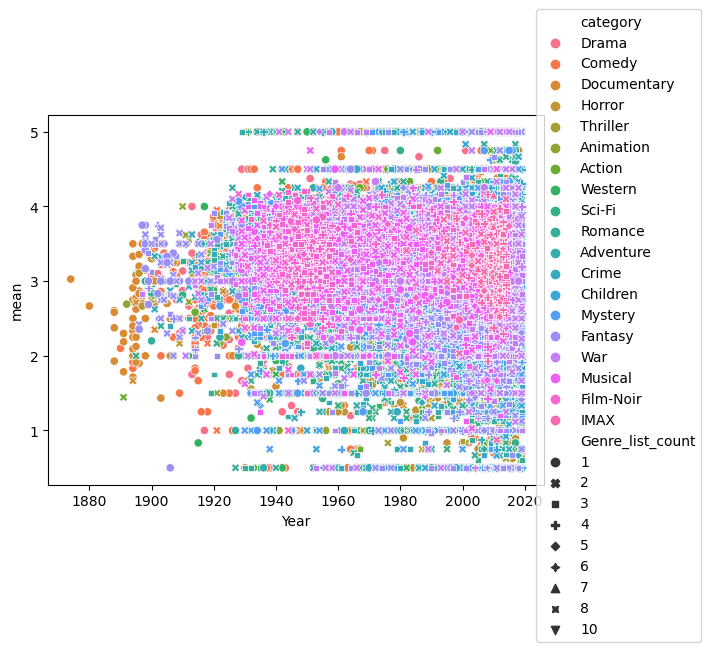

In [24]:
#markers = {'Lunch':'D', 'Dinner':'s'}
sns.scatterplot(data=Genre_categorization,y='mean', x='Year', hue='category', style='Genre_list_count') #, size='size', markers=markers)
plt.legend(loc='center', bbox_to_anchor=(1.15,0.43))

In [253]:
movies1900_2020 = Genre_categorization[(Genre_categorization['Year'] > 1900) & (Genre_categorization['count'] > 400)].sort_values(by='Year', ascending=True)

In [254]:
movies1900_2020.Year.isnull().any()

False

No handles with labels found to put in legend.


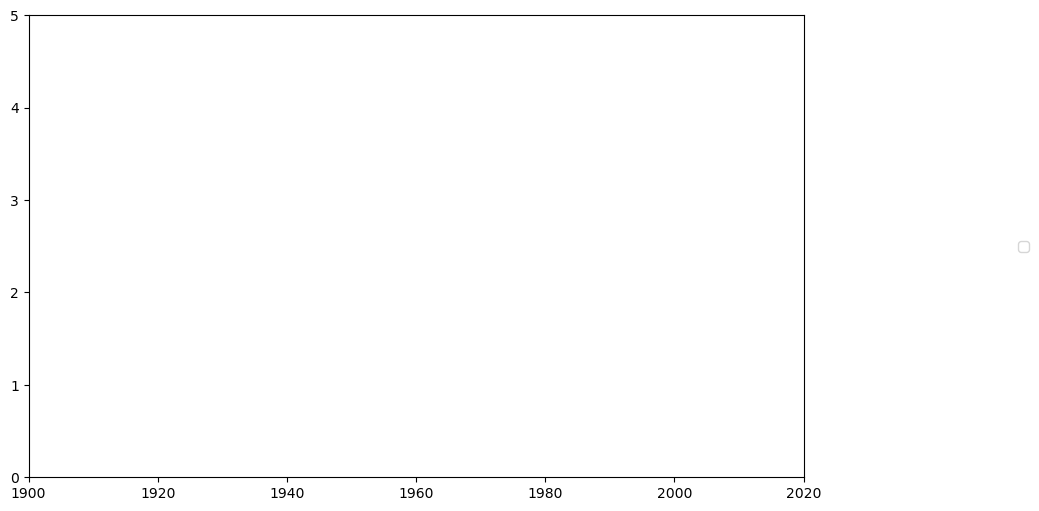

In [255]:
ratigns_vs_year = sns.scatterplot(data=movies1900_2020[(movies1900_2020.category.str.contains('Drama')) & (movies1900_2020.category.str.contains('Comedy'))], y='mean', x='Year', hue='category', style='Genre_list_count')
#ratigns_vs_year.set_xticklabels(wr.Year,rotation=90)
plt.legend(loc='right', bbox_to_anchor=(1.30,0.5))
plt.ylim(0, 5)
plt.xlim(1900, 2020)
plt.gcf().set_size_inches(10, 6)

In [256]:
movie60s_70s = movies1900_2020[(movies1900_2020.Year > 1960) & (movies1900_2020.Year < 1970)]
movie70s_80s = movies1900_2020[(movies1900_2020.Year > 1970) & (movies1900_2020.Year < 1980)]
movie80s_90s = movies1900_2020[(movies1900_2020.Year > 1980) & (movies1900_2020.Year < 1990)]
movie90s_2000s = movies1900_2020[(movies1900_2020.Year > 1990) & (movies1900_2020.Year < 2000)]
movies2000_2010 = movies1900_2020[(movies1900_2020.Year > 2000) & (movies1900_2020.Year < 2010)]
movies2010_2020 = movies1900_2020[(movies1900_2020.Year > 2010) & (movies1900_2020.Year < 2020)]

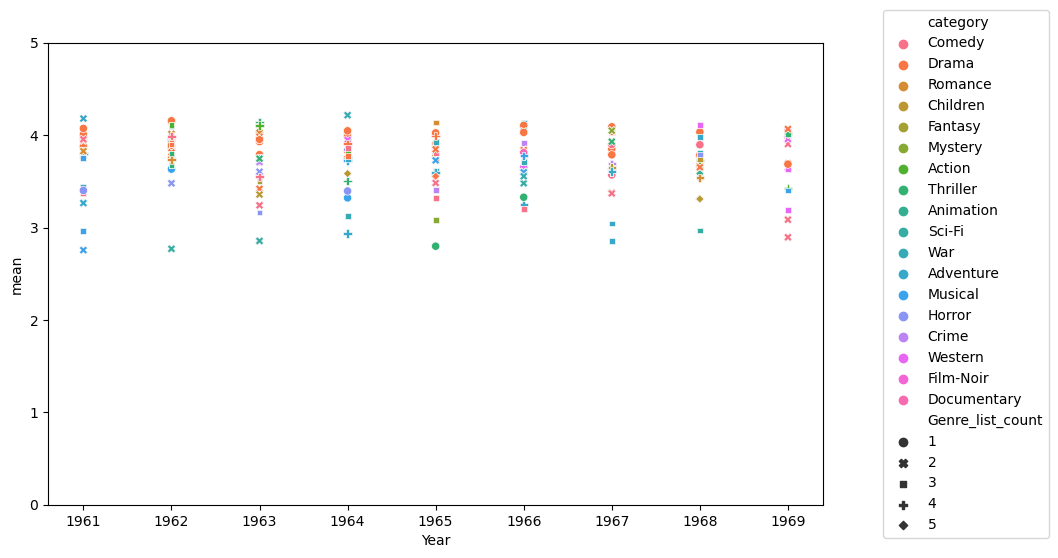

In [257]:
ratigns_vs_year = sns.scatterplot(data=movie60s_70s, y='mean', x='Year', hue='category', style='Genre_list_count')
plt.legend(loc='right', bbox_to_anchor=(1.30,0.5))
plt.ylim(0, 5)
plt.gcf().set_size_inches(10, 6)

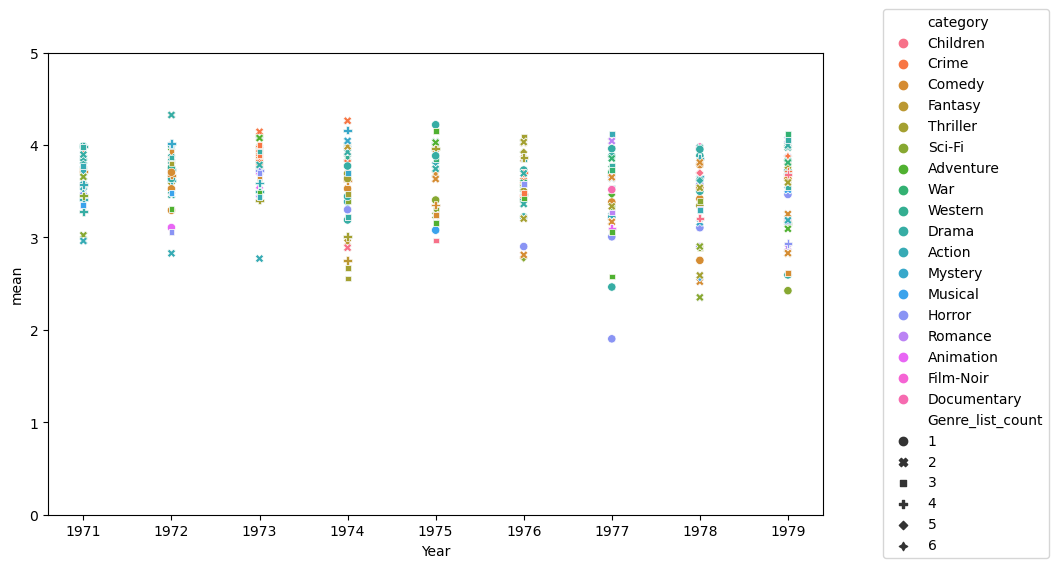

In [258]:
ratigns_vs_year = sns.scatterplot(data=movie70s_80s, y='mean', x='Year', hue='category', style='Genre_list_count')
plt.legend(loc='right', bbox_to_anchor=(1.30,0.5))
plt.ylim(0, 5)
plt.gcf().set_size_inches(10, 6)

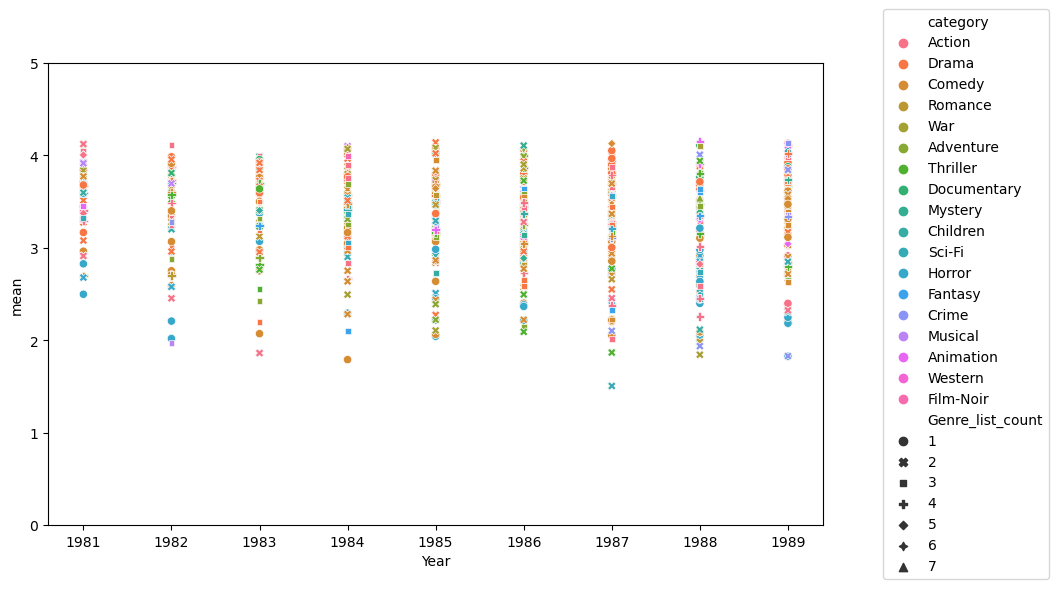

In [259]:
ratigns_vs_year = sns.scatterplot(data=movie80s_90s, y='mean', x='Year', hue='category', style='Genre_list_count')
plt.legend(loc='right', bbox_to_anchor=(1.30,0.5))
plt.ylim(0, 5)
plt.gcf().set_size_inches(10, 6)

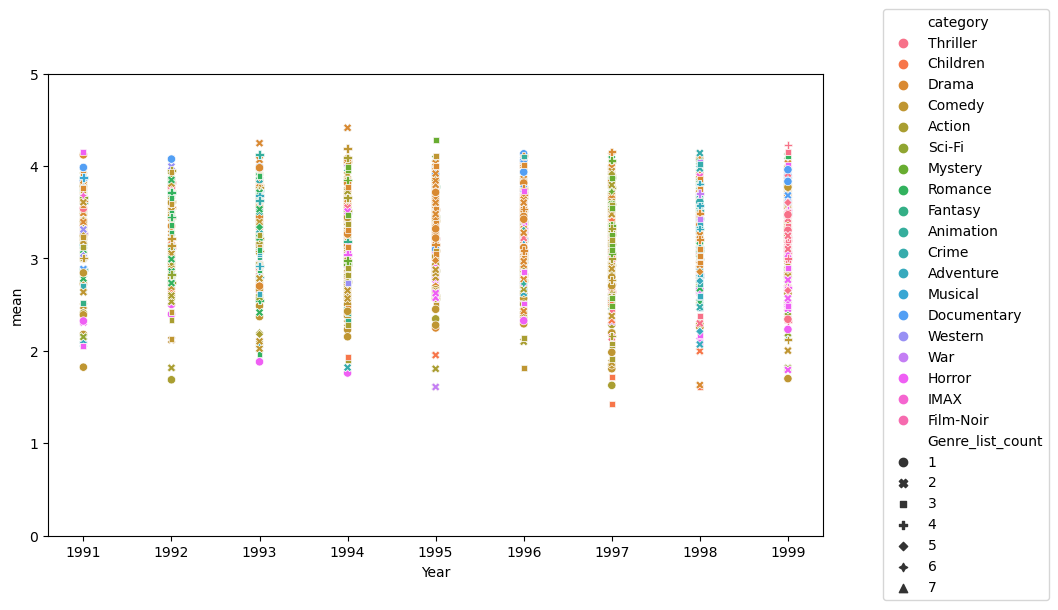

In [260]:
ratigns_vs_year = sns.scatterplot(data=movie90s_2000s, y='mean', x='Year', hue='category', style='Genre_list_count')
plt.legend(loc='right', bbox_to_anchor=(1.30,0.5))
plt.ylim(0, 5)
plt.gcf().set_size_inches(10, 6)

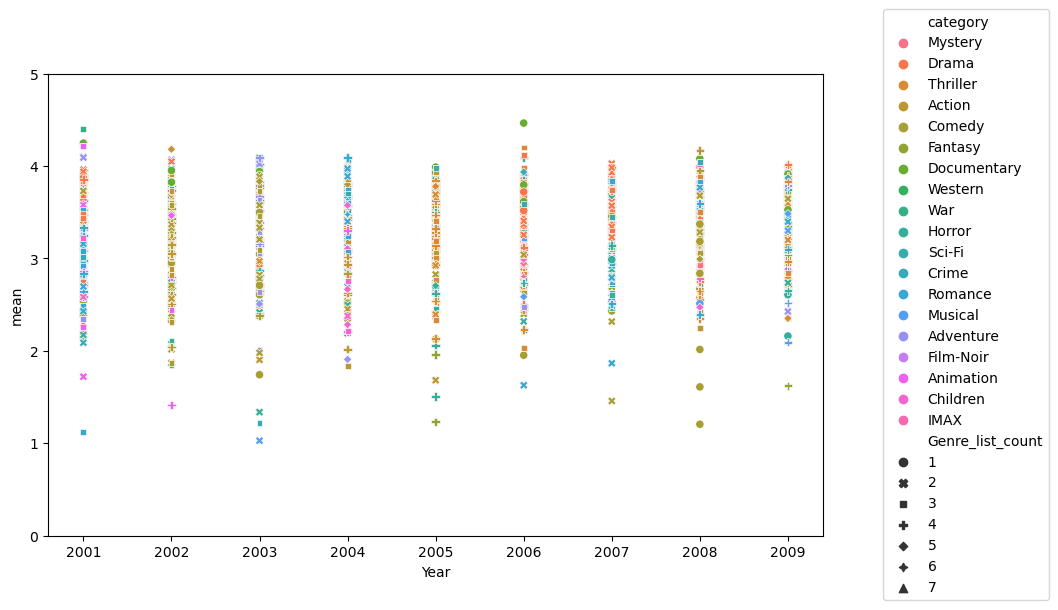

In [261]:
ratigns_vs_year = sns.scatterplot(data=movies2000_2010, y='mean', x='Year', hue='category', style='Genre_list_count')
plt.legend(loc='right', bbox_to_anchor=(1.30,0.5))
plt.ylim(0, 5)
plt.gcf().set_size_inches(10, 6)

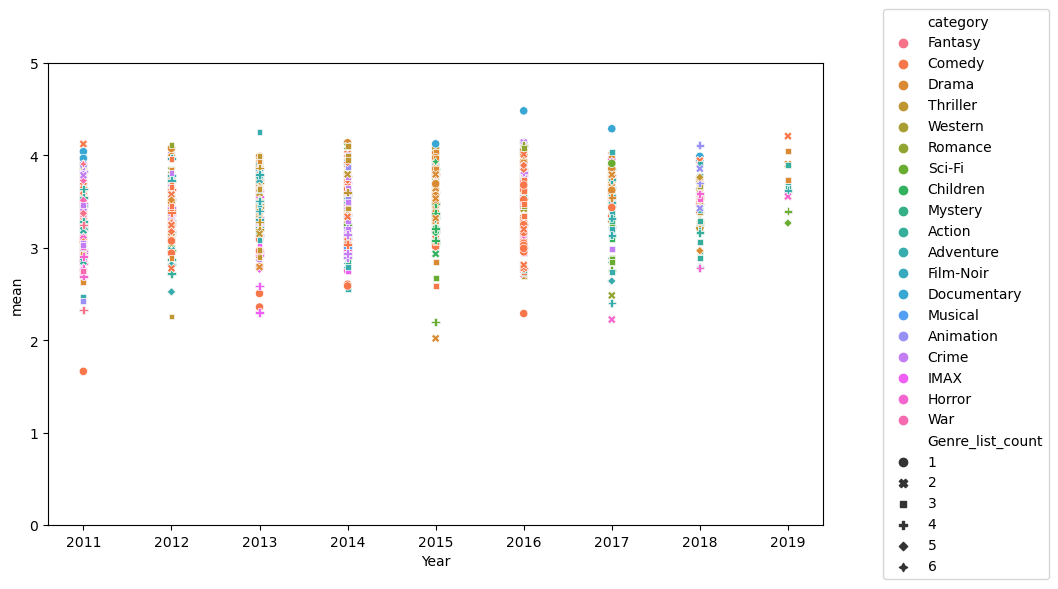

In [262]:
ratigns_vs_year = sns.scatterplot(data=movies2010_2020, y='mean', x='Year', hue='category', style='Genre_list_count')
plt.legend(loc='right', bbox_to_anchor=(1.30,0.5))
plt.ylim(0, 5)
plt.gcf().set_size_inches(10, 6)

C:\Users\Tole 01\AppData\Local\Temp\ipykernel_18264\83050857.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  wr = movies1900_2020[(movies1900_2020.category.str.contains('(Drama)|(Comedy)', regex=True))]


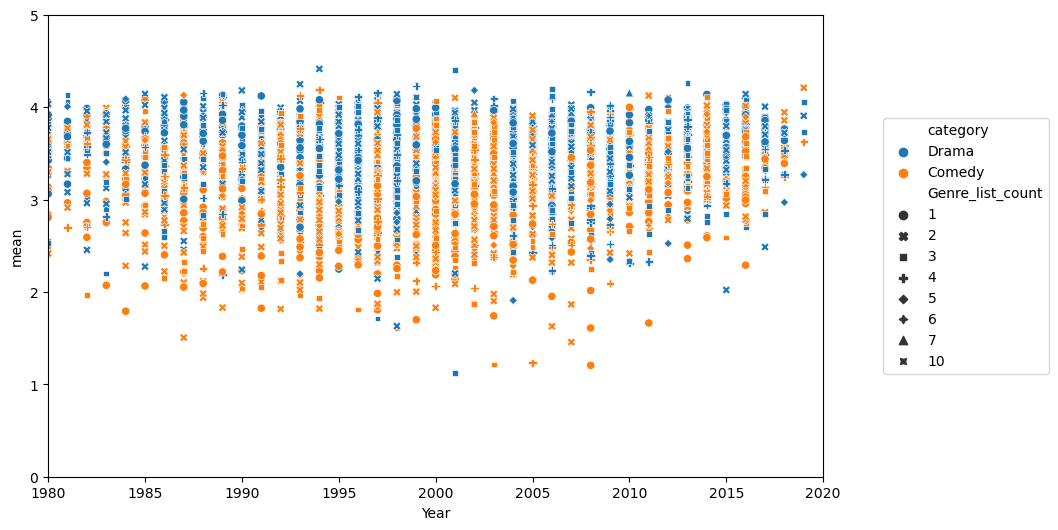

In [263]:
wr = movies1900_2020[(movies1900_2020.category.str.contains('(Drama)|(Comedy)', regex=True))]
ratigns_vs_year = sns.scatterplot(data= wr, y='mean', x='Year', hue='category', style='Genre_list_count')
#ratigns_vs_year.set_xticklabels(wr.Year,rotation=90)
plt.legend(loc='right', bbox_to_anchor=(1.30,0.5))
plt.ylim(0, 5) 
plt.xlim(1980, 2020)
plt.gcf().set_size_inches(10, 6)

In [264]:
# The size of each Genre
df_sizeOf_movies_per_genre = pd.DataFrame.from_dict(sizeOf_movies_per_genre, orient='index').sort_values(by = 0, ascending= False).reset_index()
df_sizeOf_movies_per_genre.rename(columns={'index': "Genre", 0: "Size"})

,Genre,Size
0,Drama,366345
1,Comedy,240420
2,Thriller,124635
3,Romance,109425
4,Action,103545
5,Horror,85920
6,Documentary,81240
7,Crime,75285
8,Adventure,57900
9,Sci-Fi,52350


In [265]:
# Average annual ratings for each genre
dfDrama_comedy = movies1900_2020[movies1900_2020.category.str.contains('Drama|Comedy', regex=True)]
gb = dfDrama_comedy[['category','Year','mean']].groupby(['category','Year']).mean() #|Thriller|Romance|Action|Mystery
gb

mean
category Year          
Comedy   1921  3.951719
         1923  3.922566
         1924  3.922689
         1925  4.045802
         1926  4.101534
...                 ...
Drama    2015  3.534172
         2016  3.606468
         2017  3.561372
         2018  3.578684
         2019  3.834026

[189 rows x 1 columns]

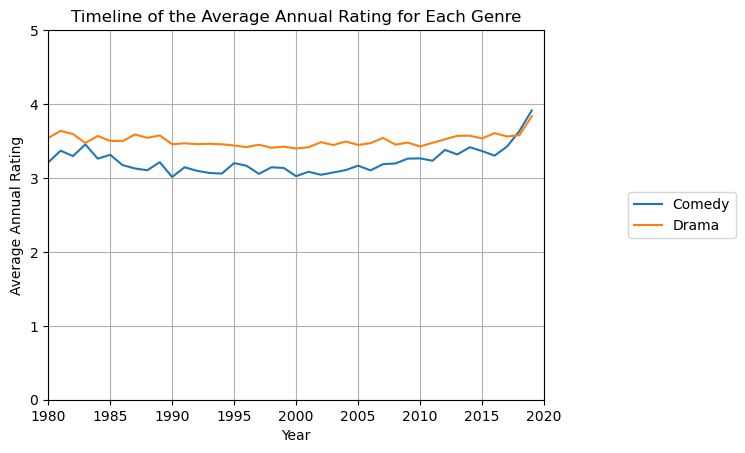

In [266]:
sns.lineplot(data=gb ,x='Year', y='mean', hue='category')
plt.legend(loc='right', bbox_to_anchor=(1.40,0.5))

plt.title('Timeline of the Average Annual Rating for Each Genre')
plt.ylabel('Average Annual Rating')
plt.xlabel('Year')

plt.ylim(0, 5) 
plt.xlim(1980, 2020) 
plt.grid(True)

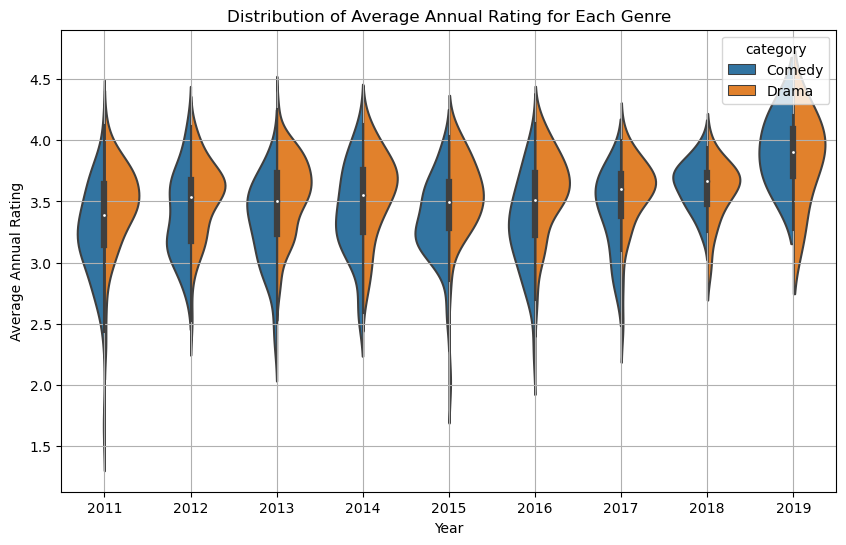

In [267]:
rt = movies1900_2020[(movies1900_2020.category.str.contains('Drama|Comedy')) & (movies1900_2020.Year > 2010)]
sns.violinplot(data=rt ,x=rt['Year'], y=rt['mean'], hue='category', dodge=True, split=True)

plt.title('Distribution of Average Annual Rating for Each Genre')
plt.ylabel('Average Annual Rating')
plt.xlabel('Year')

plt.grid(True)
plt.gcf().set_size_inches(10, 6)
plt.show()

Text(0.5, 28.99999999999976, 'Year')

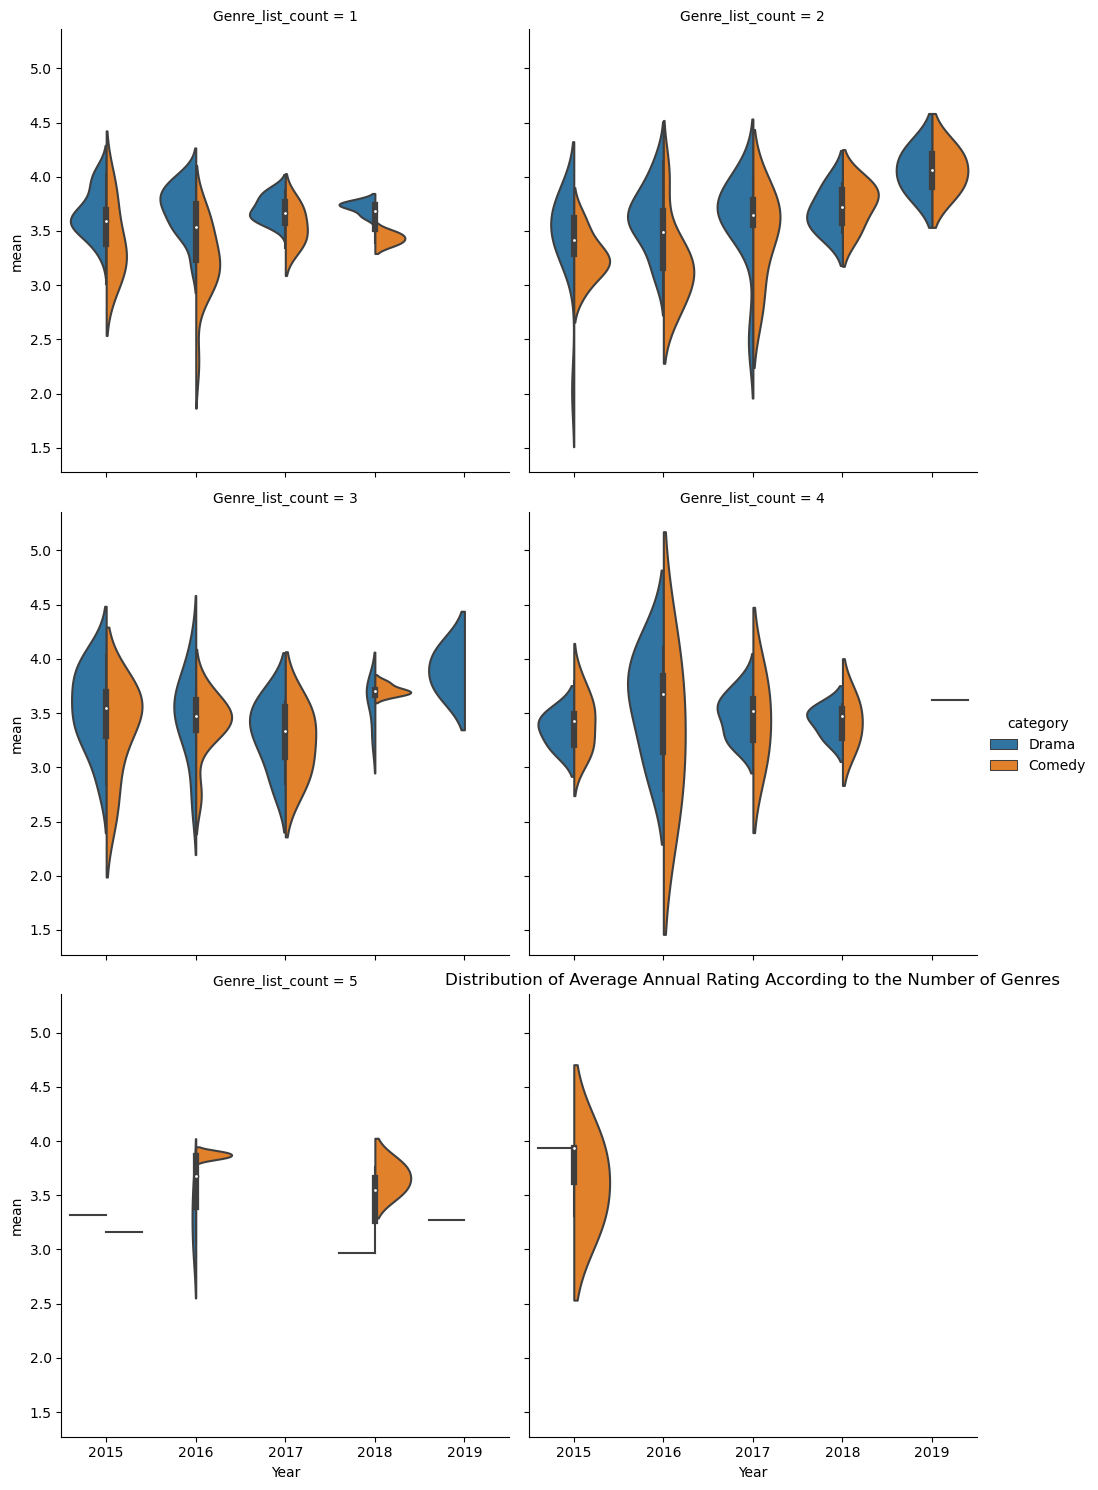

In [272]:
rt2 = movies1900_2020[(movies1900_2020.category.str.contains('Drama|Comedy')) & (movies1900_2020.Year > 2014)]
sns.catplot(data=rt2 ,x='Year', y='mean', hue='category', col='Genre_list_count',kind="violin",split=True, col_wrap=2)

plt.title('Distribution of Average Annual Rating According to the Number of Genres')
plt.ylabel('Average Annual Rating')
plt.xlabel('Year')



Text(0.5, 28.99999999999976, 'Year')

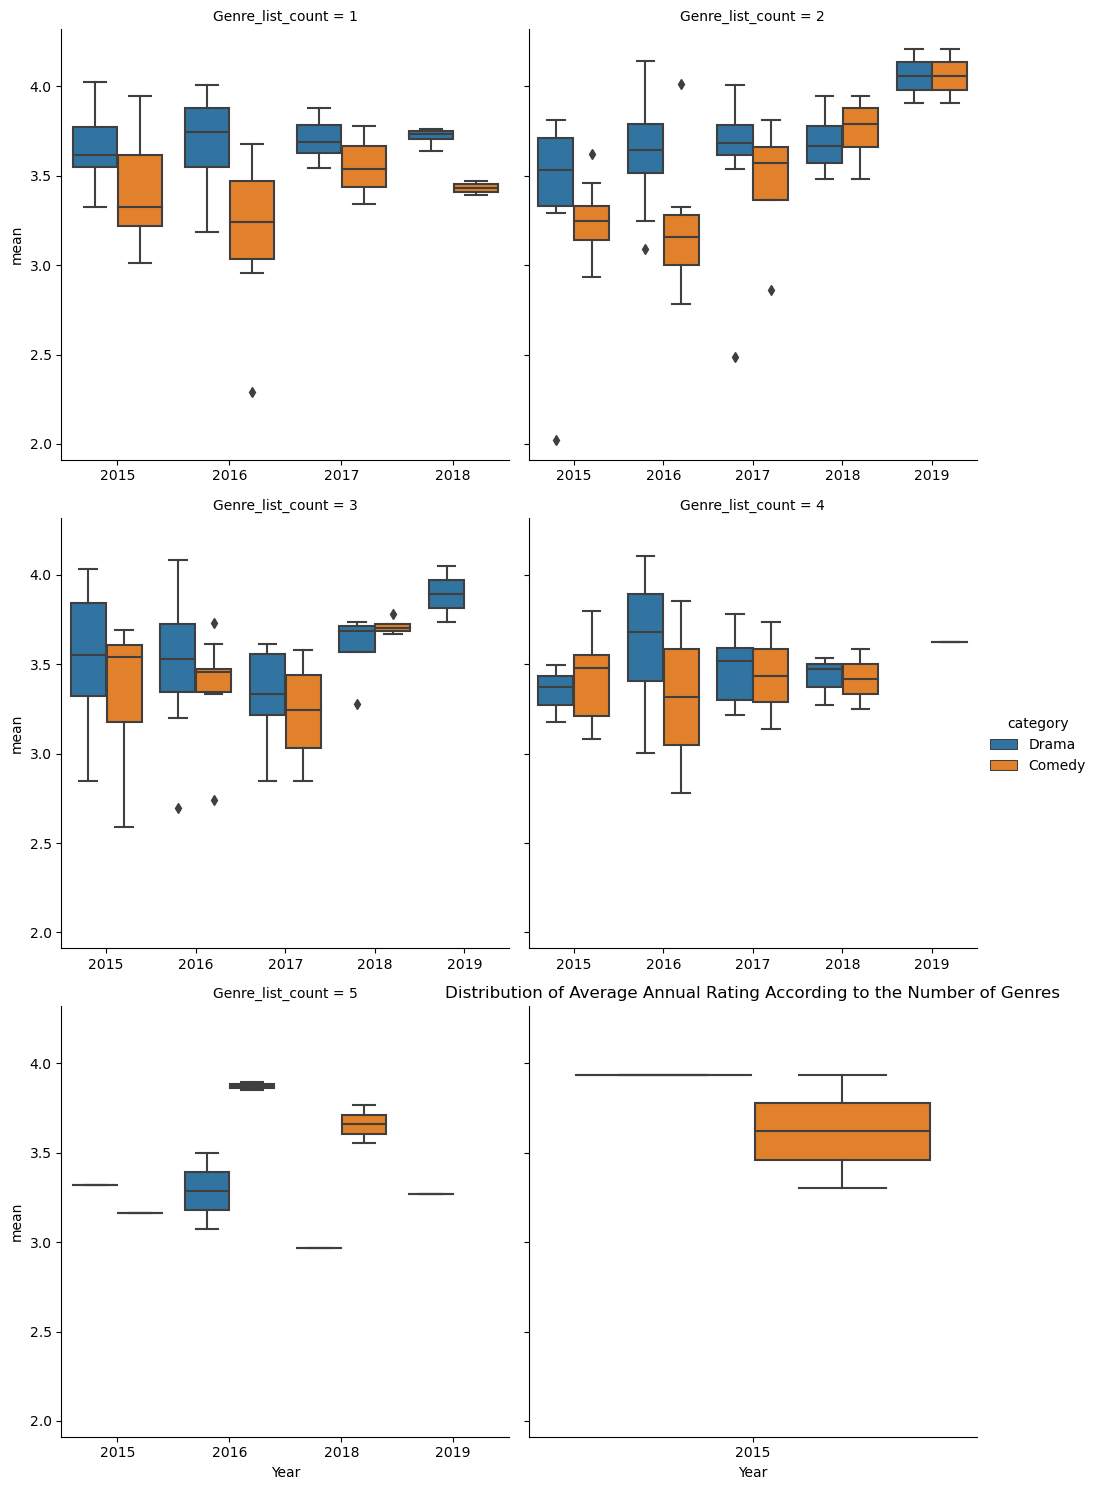

In [274]:
rt2 = movies1900_2020[(movies1900_2020.category.str.contains('Drama|Comedy')) & (movies1900_2020.Year > 2014)]

sns.catplot(data=rt2 ,x='Year', y='mean', hue='category', col='Genre_list_count',kind="box", col_wrap=2, sharey=True, sharex=False)

plt.title('Distribution of Average Annual Rating According to the Number of Genres')
plt.ylabel('Average Annual Rating')
plt.xlabel('Year')

In [270]:
rt3 = movies1900_2020[(movies1900_2020.category.str.contains('Drama|Comedy')) & (movies1900_2020.Year > 1900)]
x = rt3[['Year','count','mean', 'category']]

count_comedy = x[(x.category.str.contains('Comedy')) & (x.Year > 2010)].count()
print(f'The number of movies is {count_comedy[0]}')
x[(x.category == 'Comedy') & (x.Year > 2010)].corr()

The number of movies is 276


,count,mean
count,1.000000,0.390094
mean,0.390094,1.000000


In [271]:
count_drama = x[(x.category == 'Drama') & (x.Year > 2010)].count()
print(f' The number of movies is {count_drama[0]}')
x[(x.category == 'Drama') & (x.Year > 2010)].corr()

 The number of movies is 357


,count,mean
count,1.000000,0.348325
mean,0.348325,1.000000
